<a href="https://colab.research.google.com/github/srinikha193/Data-Analysis-Course-Work/blob/main/MachineLearning_(Part_3)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

In this notebook, we will focus on clustering, a broad class of methods for discovering
unknown subgroups in data.

## Outline
- What is the difference between supervised and unsupervised learning?
- Clustering Methods
> K-means Clustering <br>
> Hierarchical Clustering

## What is the difference between supervised and unsupervised learning?

- Supervised learning objective is prediction while unsupervised learning objective is to discover subgroups
- Unlike supervised learning we do not have an associated response variable in unsupervised learning
- Unsupervised learning is often much more challenging
- The exercise tends to be more subjective in unsupervised learning
- In unsupervised learning, there is no way to check our work because we don’t know the true answer

## Clustering Methods

__Objective__: Partitioning the observations of a dataset into distinct groups so that the observations within
each group are quite similar to each other, while observations in different
groups are quite different from each other. <br> <br>
For instance, suppose that we have a set of n observations, each with p
features. The n observations could correspond to tissue samples for patients
with breast cancer, and the p features could correspond to measurements
collected for each tissue sample; these could be clinical measurements, such
as tumor stage or grade, or they could be gene expression measurements.
We may have a reason to believe that there is some heterogeneity among
the n tissue samples; for instance, perhaps there are a few different unknown
subtypes of breast cancer. Clustering could be used to find these
subgroups. <br><br>
Another application of clustering arises in marketing where the goal is to perform market segmentation.<br><br>
In this section we focus on one of the best-known
clustering approaches, K-means clustering.

### K-means clustering

__Objective__: Partitioning the observations into a pre-specified
number of clusters.

The figure below shows the results obtained from performing K-means
clustering on a simulated example consisting of 150 observations in two
dimensions, using three different values of K. <br>
![33.PNG](https://drive.google.com/uc?export=view&id=18pC5cqbdTh1_LJdGTNhiFlBww3SEdeqF)

The K-means clustering procedure results from a simple and intuitive
mathematical problem. <br>We begin by defining some notation. Let $C_{1}$, . . ., $C_{K}$
denote sets containing the indices of the observations in each cluster. These
sets satisfy two properties:



![name](https://drive.google.com/uc?export=view&id=1IFO-C-1WGYuffsyfRaqZ_eyw4J34jINQ)

The idea behind K-means clustering is that a good clustering is one for which the
within-cluster variation is as small as possible. The within-cluster variation
for cluster Ck is a measure $W(C_{k})$ of the amount by which the observations
within a cluster differ from each other. Hence we want to minimize the following: <br>
![35.PNG](https://drive.google.com/uc?export=view&id=1BOX3jy_gXUselOd8WPgxCVZJ3odhHvmk)

Where $W(C_{k})$ is equal to: <br>
![36.PNG](https://drive.google.com/uc?export=view&id=17vvqaUbofZFJLYD44msk4xHPiDN-z55w) <br>
where $|C_{k}|$ denotes the number of observations in the $k$th cluster. In other
words, the within-cluster variation for the $k$th cluster is the sum of all of
the pairwise squared Euclidean distances between the observations in the
kth cluster, divided by the total number of observations in the kth cluster.Thus we minimize the following:<br>
![37.PNG](https://drive.google.com/uc?export=view&id=1ZrEO_2Dr44dksoJsGx43AgMhZIm5-R_Y)

In other words our objective is to minimize the squared distance between each member of the cluster and its centroid. <br> The following steps can be used to solve the above problem:
1. Randomly assign a number, from 1 to K, to each of the observations.
These serve as initial cluster assignments for the observations.
2. Iterate until the cluster assignments stop changing.

Note: To perform K-means clustering, we must decide how
many clusters we expect in the data. The problem of selecting K is far from
simple.

### Modeling K-Means Clustering using Scikit-Learn

Let's import the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

We begin with a simple simulated example in which there truly are two clusters in the
data: the first 25 observations have a mean shift relative to the next 25
observations.

In [ ]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [ ]:
X

array([[ 9.95832422e+01, -1.00056267e+02],
       [ 9.78638039e+01, -9.83597292e+01],
       [ 9.82065644e+01, -1.00841747e+02],
       [ 1.00502881e+02, -1.01245288e+02],
       [ 9.89420478e+01, -1.00909008e+02],
       [ 1.00551454e+02, -9.77077920e+01],
       [ 1.00041539e+02, -1.01117925e+02],
       [ 1.00539058e+02, -1.00596160e+02],
       [ 9.99808695e+01, -9.88249988e+01],
       [ 9.92521291e+01, -9.99909747e+01],
       [ 9.91218921e+01, -1.00156434e+02],
       [ 1.00256570e+02, -1.00988779e+02],
       [ 9.96611780e+01, -1.00236184e+02],
       [ 9.93623450e+01, -1.01187612e+02],
       [ 9.85787828e+01, -1.00153495e+02],
       [ 9.97309430e+01, -9.77686332e+01],
       [ 9.75652324e+01, -9.98872735e+01],
       [ 1.00370445e+02, -9.86403661e+01],
       [ 1.00501857e+02, -1.00844214e+02],
       [ 1.00000010e+02, -9.94576474e+01],
       [ 9.96864918e+01, -9.92289883e+01],
       [ 9.81319093e+01, -9.82688153e+01],
       [ 1.01467678e+02, -1.00335677e+02],
       [ 1.

We now perform K-means clustering with K = 2.

In [ ]:
km1 = KMeans(n_clusters=2, n_init=20)
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
#The final results will be the best output of n_init consecutive runs in terms of inertia.
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [ ]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

_inertia__ returns the sum of squared distances of samples to their closest cluster center.

In [ ]:
km1.inertia_

99.30578397914684

In [ ]:
km1.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

As you see from the labels the K-means clustering perfectly separated the observations into two clusters
even though we did not supply any group information to kmeans().

We could instead have performed K-means clustering on this example with K = 3.

In [ ]:
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(n_clusters=3, n_init=20)

In [ ]:
km2.labels_

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2], dtype=int32)

In [ ]:
km2.inertia_

68.97379200939723

We can plot the data, with each observation colored according to its cluster
assignment.

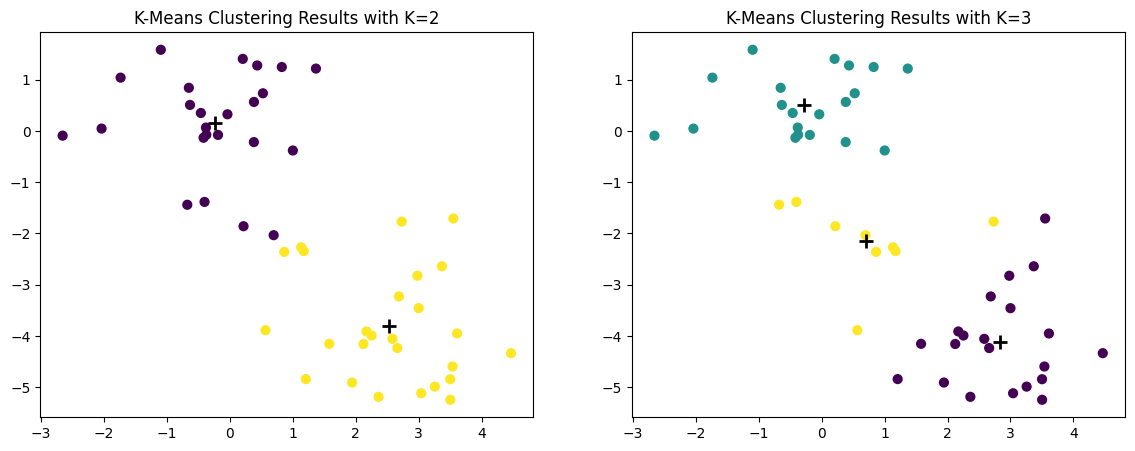

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_)
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_)
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

## Hierarchical Clustering

One potential disadvantage of K-means clustering is that it requires us to
pre-specify the number of clusters K. Hierarchical clustering is an alternative
approach which does not require that we commit to a particular
choice of K. Hierarchical clustering has an added advantage over K-means
clustering in that it results in an attractive tree-based representation of the
observations, called a __dendrogram__.

### Interpreting a Dendrogram

We begin with the simulated data set shown in the figure below:<br>
![40.PNG](https://drive.google.com/uc?export=view&id=1_fMA36cO51Mj8Sla2AyEBhWibqCPR5Rl)

Figure above consists of
45 observations in two-dimensional space. The data were generated from a
three-class model; the true class labels for each observation are shown in
distinct colors. However, suppose that the data were observed without the
class labels, and that we wanted to perform hierarchical clustering of the
data. Hierarchical clustering
yields the result shown in the figure below. How can we
interpret this dendrogram?

![41.PNG](https://drive.google.com/uc?export=view&id=1VAwhmI4tsGHiGeU5FMs8zn02_Qe1nT_P)

In the figure above, each leaf of the dendrogram represents
one of the 45 observations. However, as we move
up the tree, some leaves begin to fuse into branches. The earlier
(lower in the tree) fusions occur, the more similar the groups of observations
are to each other. On the other hand, observations that fuse later
(near the top of the tree) can be quite different. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are. Thus, observations that fuse at the very
bottom of the tree are quite similar to each other, whereas observations
that fuse close to the top of the tree will tend to be quite different.

Now that we understand how to interpret a dendrogram let's see how we can identify clusters on the basis
of a dendrogram. In order to do this, we make a horizontal cut across the
dendrogram, as shown in the figures below. <br>
![42.PNG](https://drive.google.com/uc?export=view&id=1Nlq2YwAsCJMCQxLzsk9vToEqoS73txok)

The distinct sets of observations beneath the cut can be interpreted as clusters. In the left-hand pannel, cutting the dendrogram at a height of nine results in two clusters, shown in distinct colors. In the right-hand
pannel, cutting the dendrogram at a height of five results in three clusters. the height of the cut to the dendrogram serves the same role as the K in K-means clustering: it controls the number of
clusters obtained.

### The Hierarchical Clustering Algorithm

We begin by defining some sort of dissimilarity measure between
each pair of observations. Most often, Euclidean distance is used for estimating the dissimilarity. The algorithm
proceeds iteratively. Starting out at the bottom of the dendrogram,
each of the n observations is treated as its own cluster. The two clusters
that are most similar to each other are then fused so that there now are
n−1 clusters. Next the two clusters that are most similar to each other are
fused again, so that there now are n − 2 clusters. The algorithm proceeds
in this fashion until all of the observations belong to one single cluster, and
the dendrogram is complete. The figure below shows the steps of the Hierarchical Clustering Algorithm: <br>
![45.PNG](https://drive.google.com/uc?export=view&id=1hpMUC397id4kEbDSu7IqGpKB6nZXAnis)

The figure below depicts the first few steps of the algorithm:
![43.PNG](https://drive.google.com/uc?export=view&id=1jRn3bIq1bxT38F_jSUKD-0JcMVtinAzk)    

Consider the bottom right panel in the figure. How did we
determine that the cluster {5, 7} should be fused with the cluster {8}? They are fused with each other based on the notion of linkage, which defines the dissimilarity between two groups of observations. The four most common types of linkage — complete, average, single,
and centroid—are briefly described in the table below: <br>
![44.PNG](https://drive.google.com/uc?export=view&id=1PIkWNOo7Rp3Ow6XIKep31CHxwGqQkTGk)

The example above has used Euclidean distance as the
dissimilarity measure. But sometimes other dissimilarity measures might
be preferred. For example, correlation-based distance considers two observations
to be similar if their features are highly correlated, even though the
observed values may be far apart in terms of Euclidean distance.

## Modeling Hierarchical Clustering using Scipy

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

Let's import the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc


In [ ]:
data = pd.read_csv('Spending on Products.csv')
data.shape

(440, 8)

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk.

In [ ]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [ ]:
data_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.044948,0.045611,0.032833,0.029466,0.030613,0.025512,0.024679,0.022695
std,0.015905,0.013886,0.034604,0.037519,0.036587,0.040318,0.040835,0.041972
min,0.033981,0.017935,0.000008,0.000280,0.000012,0.000208,0.000026,0.000045
25%,0.033981,0.035869,0.008558,0.007793,0.008289,0.006164,0.002199,0.006076
50%,0.033981,0.053804,0.023267,0.018438,0.018309,0.012673,0.006993,0.014370
75%,0.067963,0.053804,0.046332,0.036553,0.041025,0.029518,0.033590,0.027091
max,0.067963,0.053804,0.306851,0.373636,0.357205,0.505516,0.349666,0.713546


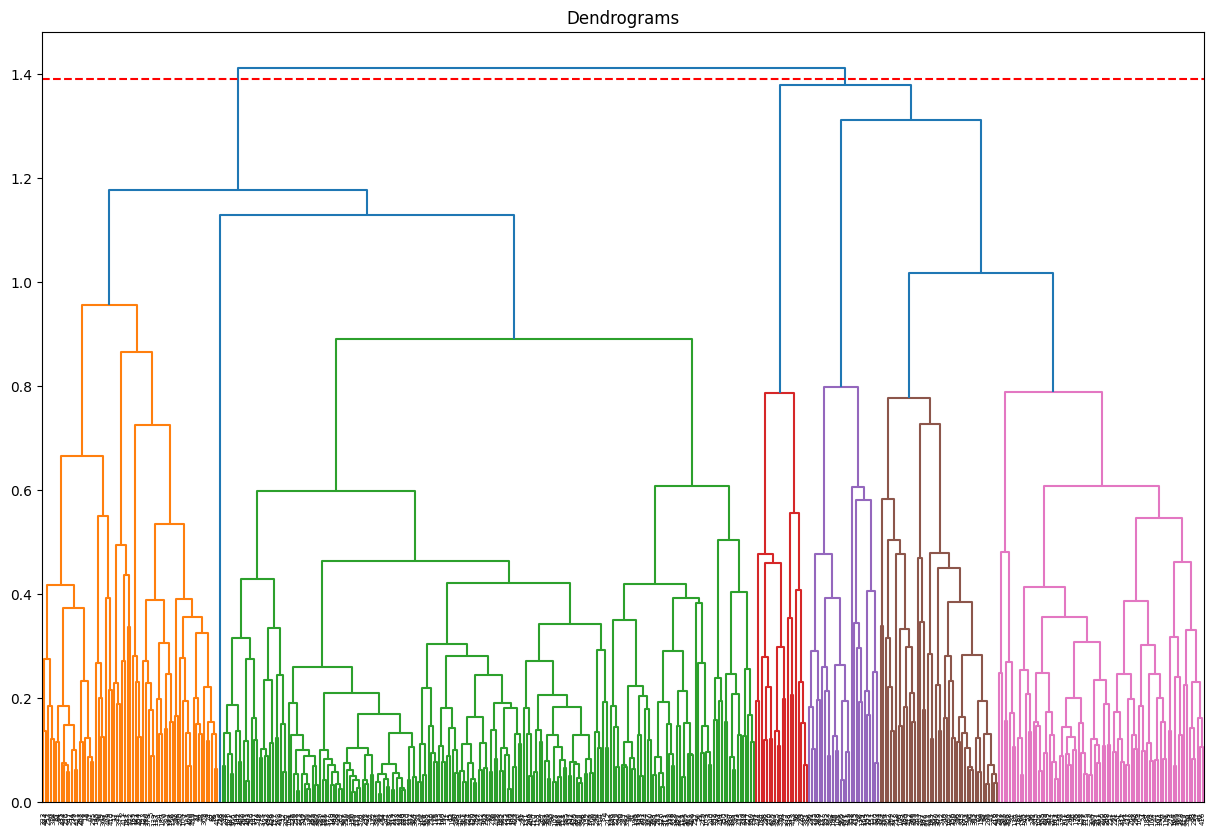

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.axhline(y=1.39, color='r', linestyle='--')


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,

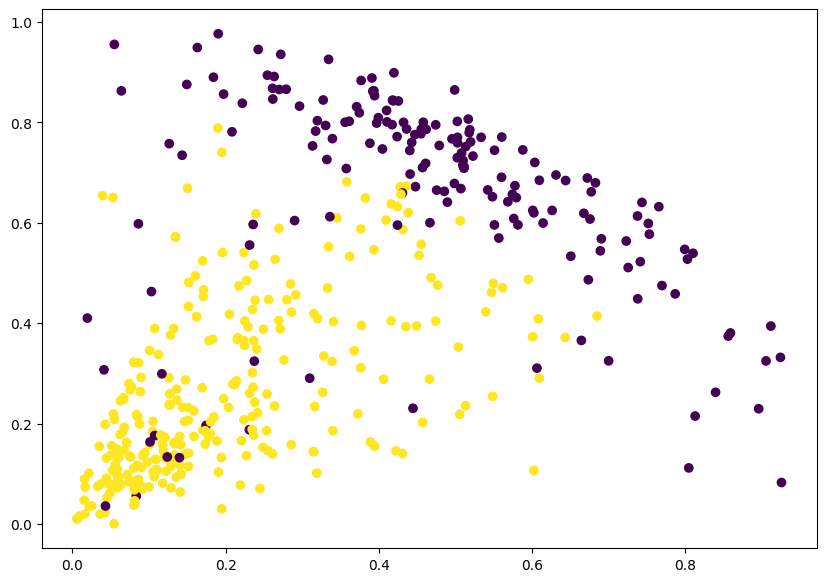

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Practical Issues in Clustering

Clustering can be a very useful tool for data analysis in the unsupervised
setting. However, there are a number of issues that arise in performing
clustering. We describe some of these issues here. <br><br>
In order to perform clustering, some decisions must be made. <br><br>
- Should the observations or features first be standardized in some way? For instance, maybe the variables should be centered to have mean zero and scaled to have standard deviation one.
- In the case of hierarchical clustering: <br>
> What dissimilarity measure should be used?<br><br>
> What type of linkage should be used?<br><br>
> Where should we cut the dendrogramin order to obtain clusters?<br><br>
- In the case of K-means clustering, how many clusters should we look for in the data? <br><br>

Each of these decisions can have a strong impact on the results obtained.
In practice, we try several different choices, and look for the one with
the most useful or interpretable solution. With these methods, there is no
single right answer—any solution that exposes some interesting aspects of
the data should be considered.